In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
plt.style.use("seaborn-v0_8")
from sklearn.model_selection import train_test_split


In [7]:
# Step-1 Generate Toy(Dummy) Dataset

X, y = make_blobs(n_samples=2000, n_features=2, cluster_std = 3, centers = 2, random_state=42)
#n_features=2
print(X.shape,y.shape)

(2000, 2) (2000,)


In [8]:
print(y)

[0 0 0 ... 1 0 1]


In [9]:
# Step - 2 Visualise Dataset
def visualise(X,y):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="viridis")
    plt.show()


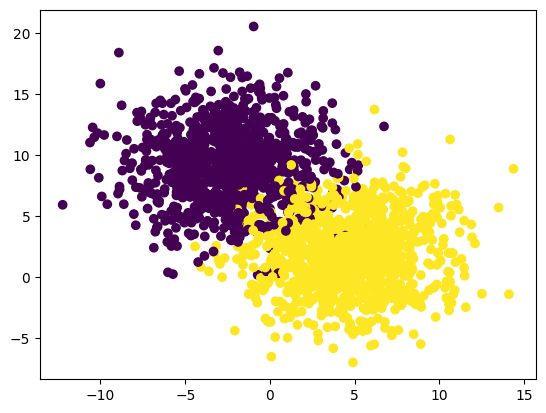

In [10]:
visualise(X,y)

In [11]:
# Step - 3
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)

    return (X-u)/std


In [12]:
X = normalise(X)

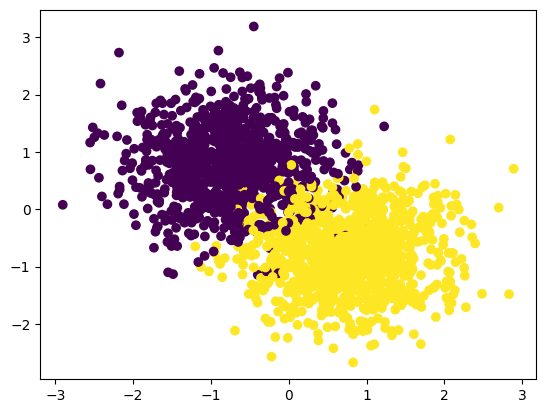

In [13]:
visualise(X,y)

In [14]:
# Step - 4 Train Test Split
XT, Xt, yT, yt = train_test_split(X,y, test_size=0.25, shuffle=False, random_state=0)

print(XT.shape, yT.shape)
print(Xt.shape, yt.shape)

(1500, 2) (1500,)
(500, 2) (500,)


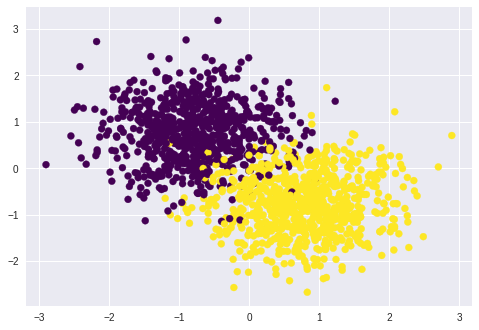

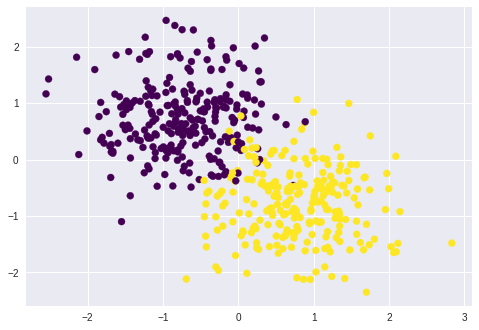

In [ ]:
visualise(XT,yT)
visualise(Xt,yt)

In [ ]:
# Model
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

# Binary Cross Entropy
def error(y,yp):
    loss = -np.mean(y*np.log(yp) + (1-y)*np.log(1-yp))
    return loss

def gradient(X,y,yp):
    m = X.shape[0]
    grad = -(1/m)*np.dot(X.T, (y-yp))
    return grad

def train(X,y,max_iters=100,learning_rate=0.1):

    # Randomly init theta
    theta = np.random.randn(n_features + 1,1)

    error_list = []

    for i in range(max_iters):
        yp = hypothesis(X,theta)
        e = error(y,yp)
        error_list.append(e)
        grad = gradient(X,y,yp)
        theta = theta - learning_rate*grad

    plt.plot(error_list)
    return theta

def predict(X,theta):
    h = hypothesis(X,theta)
    preds = np.zeros((X.shape[0],1),dtype='int')
    preds[h >= 0.5] = 1

    return preds

def accuracy(X,y,theta):
    preds = predict(X,theta)
    return ((y==preds).sum())/y.shape[0]*100


In [ ]:
def addExtraColumn(X):
    if X.shape[1] == n_features:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones,X))

    return X

In [ ]:
XT = addExtraColumn(XT)
print(XT)

[[ 1.         -1.43211741  0.65078613]
 [ 1.         -0.47100516  0.87372191]
 [ 1.         -0.40182883  2.1275269 ]
 ...
 [ 1.          0.02390726  0.74454457]
 [ 1.         -0.35936993  0.18771848]
 [ 1.          1.09360417 -1.10077065]]


In [ ]:
Xt = addExtraColumn(Xt)
print(Xt)

[[ 1.         -1.17860853  1.9119189 ]
 [ 1.          0.70445084 -1.55536144]
 [ 1.          0.39063944 -0.10336496]
 ...
 [ 1.          1.96970601 -0.24632291]
 [ 1.         -0.80805197 -0.01411826]
 [ 1.          0.83964924  0.53655099]]


In [ ]:
print(XT.shape)

(1500, 3)


In [ ]:
yT = yT.reshape(-1,1)
yt = yt.reshape(-1,1)

In [ ]:
print(yT.shape)
print(yt.shape)

(1500, 1)
(500, 1)


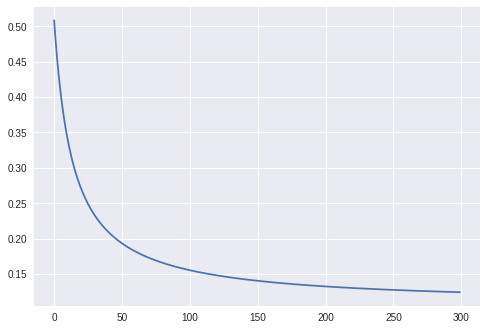

In [ ]:
theta = train(XT,yT,max_iters=300,learning_rate=0.2)

In [ ]:
theta

array([[ 0.04633124],
       [ 2.59632583],
       [-2.59598522]])

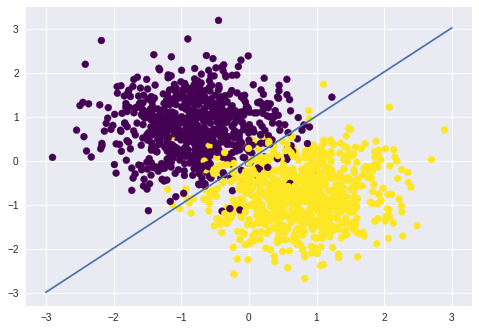

In [ ]:
# Decision Boundary Visualisation
plt.scatter(XT[:,1],XT[:,2],c=yT,cmap="viridis")

x1 = np.linspace(-3,3,6)
x2 = -(theta[0][0] + theta[1][0]*x1)/theta[2][0]
plt.plot(x1,x2)
plt.show()

In [ ]:
# Predictions
preds = predict(Xt,theta)

In [ ]:
# Train Accuracy
accuracy(XT,yT,theta)

95.86666666666666

In [ ]:
# Test Accuracy
accuracy(Xt,yt,theta)

96.2

In [ ]:
# ------ SkLearn Library -----

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create
X, y = make_blobs(n_samples=2000, n_features=2, cluster_std = 3, centers = 2, random_state=42)

model = LogisticRegression()

In [ ]:
# Training
model.fit(XT,yT)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Predictions
model.predict(Xt)

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
# Scoring
model.score(XT,yT)

0.958

In [ ]:
model.score(Xt,yt)

0.962

In [ ]:
# ------ Multiclass Classification -----

In [ ]:
X, y = make_blobs(n_samples=2000, n_features=5, cluster_std = 3, centers = 3, random_state=42)

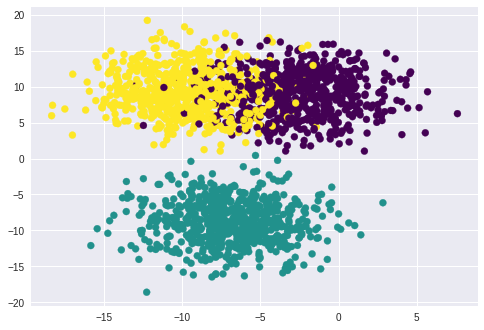

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
plt.show()

In [ ]:
print(np.unique(y,return_counts=True))

(array([0, 1, 2]), array([667, 667, 666]))


In [ ]:
model = LogisticRegression(multi_class='ovr')

In [ ]:
model.fit(X,y)

LogisticRegression(multi_class='ovr')

In [ ]:
model.predict(X)

array([0, 2, 0, ..., 2, 2, 2])

In [ ]:
model.score(X,y)

0.976